<a href="https://colab.research.google.com/github/manimaran1605/Dicke-Model/blob/main/VQE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install qutip

In [67]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [37]:
sxx = tensor(sigmax(), sigmax())
syy = tensor(sigmay(), sigmay())
szz = tensor(sigmaz(), sigmaz())
II = tensor(qeye(2), qeye(2))

In [38]:
H = II - 2 * sxx + 3 * syy - 2 * szz

In [39]:
H.groundstate()

(-6.000000000000001,
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[0.70710678]
  [0.        ]
  [0.        ]
  [0.70710678]])

In [40]:
(1/np.sqrt(2))*(tensor(basis(2, 0), basis(2,0)) + tensor(basis(2,1), basis(2,0)))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.70710678]
 [0.        ]
 [0.70710678]
 [0.        ]]

In [50]:
def trial_state(theta):
    rot = np.cos(theta/2) * qeye(2) - 1j * np.sin(theta/2) * sigmay()
    return (1/np.sqrt(2))*(tensor(rot * basis(2, 0), basis(2,0)) + tensor(rot * basis(2,1), basis(2,1)))


In [51]:
theta_val = np.linspace(0, 2 * np.pi, 100)
eval = np.zeros(len(theta_val))
i = 0
for theta in theta_val:
  eval[i] = expect(H, trial_state(theta))
  i += 1

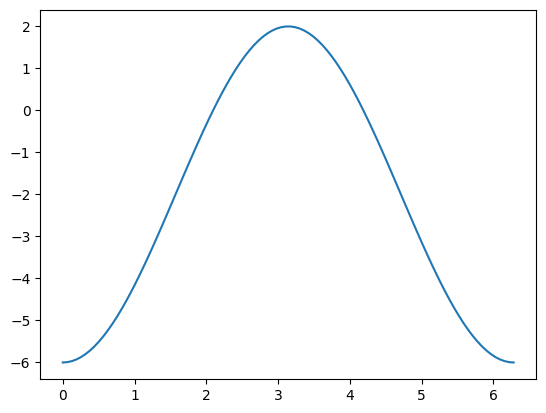

In [52]:
plt.plot(theta_val, eval)

In [53]:
id = np.argmin(eval)
eigenvalue = eval[id]

print("The lowest Eigenvalue is ", eigenvalue)

The lowest Eigenvalue is  -5.999999999999999


In [54]:
#how to imporve the vqe?
def trial_state2(theta1, theta2):
    rot1 = np.cos(theta1/2) * qeye(2) - 1j * np.sin(theta1/2) * sigmay()
    rot2 = np.cos(theta2/2) * qeye(2) - 1j * np.sin(theta2/2) * sigmay()
    return (1/np.sqrt(2))*(tensor(rot1 * basis(2, 0), rot2 * basis(2,0)) + tensor(rot1 * basis(2,1), rot2 * basis(2,1)))


In [60]:
theta_val = np.linspace(0, 2 * np.pi, 100)
eval2 = np.zeros([len(theta_val), len(theta_val)])
i = 0
j = 0
for theta1 in theta_val:
  for theta2 in theta_val:
      eval2[i][j] = expect(H, trial_state2(theta1, theta2))
      j += 1
  j = 0
  i += 1

In [66]:
xminimum_value = np.min(eval2)
print("minimum_value", minimum_value)

#accuracy is improved!

minimum_value -6.000000000000001
